In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [20]:
API_KEY='397f79aca2e8efce3aba5c6d5e0efc33'
CITY='Mysuru'

In [22]:
def fetch_aqi_data(api_key,city,start,end):
    geo_url=f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
    geo_response=requests.get(geo_url)
    geo_data=geo_response.json()
    if len(geo_data)==0:
        raise ValueError(f"city {city} not found")

    lat=geo_data[0]['lat']
    lon=geo_data[0]['lon']

    url=f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    response=requests.get(url)
    data=response.json()
    return data

end_time=int(datetime.datetime.now().timestamp())
start_time=end_time-(7*24*60*60)#7days

#fetch
aqi_data=fetch_aqi_data(API_KEY,CITY,start_time,end_time)


In [23]:
aqi_data

{'coord': {'lon': 76.6554, 'lat': 12.3052},
 'list': [{'main': {'aqi': 1},
   'components': {'co': 393.87,
    'no': 1.61,
    'no2': 7.71,
    'o3': 24.32,
    'so2': 3.07,
    'pm2_5': 3.91,
    'pm10': 6.04,
    'nh3': 1.84},
   'dt': 1731560400},
  {'main': {'aqi': 1},
   'components': {'co': 373.84,
    'no': 0.57,
    'no2': 7.54,
    'o3': 25.75,
    'so2': 3.07,
    'pm2_5': 3.48,
    'pm10': 5.14,
    'nh3': 1.84},
   'dt': 1731564000},
  {'main': {'aqi': 1},
   'components': {'co': 367.16,
    'no': 0.08,
    'no2': 7.03,
    'o3': 27.89,
    'so2': 2.95,
    'pm2_5': 2.86,
    'pm10': 4.07,
    'nh3': 1.58},
   'dt': 1731567600},
  {'main': {'aqi': 1},
   'components': {'co': 383.85,
    'no': 0.14,
    'no2': 7.03,
    'o3': 30.04,
    'so2': 2.65,
    'pm2_5': 2.58,
    'pm10': 3.69,
    'nh3': 1.52},
   'dt': 1731571200},
  {'main': {'aqi': 1},
   'components': {'co': 400.54,
    'no': 0.24,
    'no2': 7.63,
    'o3': 29.68,
    'so2': 2.38,
    'pm2_5': 2.57,
    'pm10':

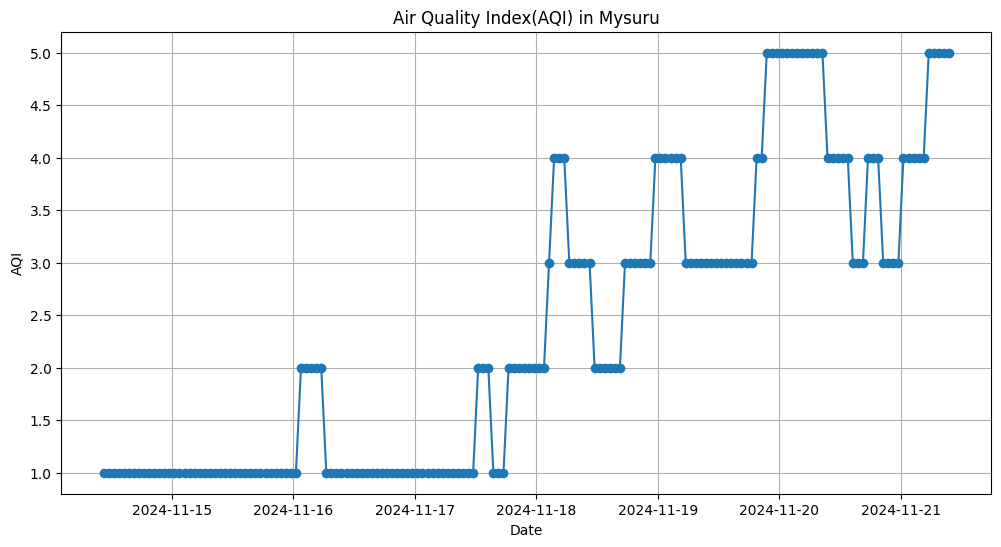

In [26]:
def process_aqi_data(data):
    records=[]
    for item in data['list']:
        dt=datetime.datetime.fromtimestamp(item['dt'])
        aqi=item['main']['aqi']
        components=item['components']
        record={
            'datetime':dt,
            'aqi':aqi,
            **components
        }
        records.append(record)
    return pd.DataFrame(records)

aqi_df=process_aqi_data(aqi_data)

plt.figure(figsize=(12,6))
plt.plot(aqi_df['datetime'],aqi_df['aqi'],marker='o',linestyle='-')
plt.title(f'Air Quality Index(AQI) in {CITY}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

In [28]:
aqi_df

,datetime,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2024-11-14 10:30:00,1,393.87,1.61,7.71,24.32,3.07,3.91,6.04,1.84
1,2024-11-14 11:30:00,1,373.84,0.57,7.54,25.75,3.07,3.48,5.14,1.84
2,2024-11-14 12:30:00,1,367.16,0.08,7.03,27.89,2.95,2.86,4.07,1.58
3,2024-11-14 13:30:00,1,383.85,0.14,7.03,30.04,2.65,2.58,3.69,1.52
4,2024-11-14 14:30:00,1,400.54,0.24,7.63,29.68,2.38,2.57,3.73,1.57
...,...,...,...,...,...,...,...,...,...,...
163,2024-11-21 05:30:00,5,487.33,0.00,6.77,49.35,4.05,81.06,94.03,2.19
164,2024-11-21 06:30:00,5,514.03,0.00,8.14,50.78,4.95,91.43,105.59,2.15
165,2024-11-21 07:30:00,5,554.09,0.08,11.14,52.21,5.66,98.43,115.07,2.38
166,2024-11-21 08:30:00,5,587.46,0.65,13.20,58.65,5.96,101.87,119.98,2.44


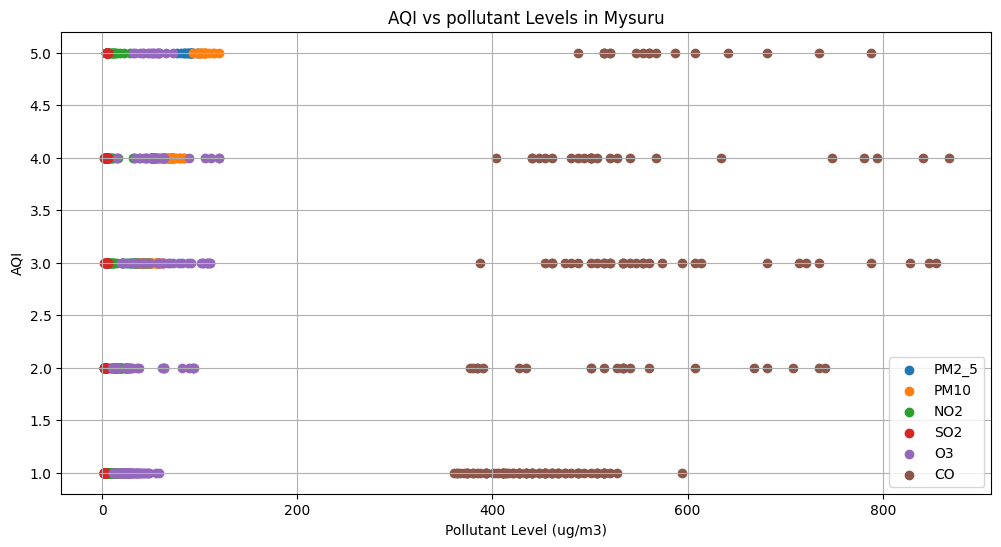

In [34]:
components=['pm2_5','pm10','no2','so2','o3','co']
plt.figure(figsize=(12,6))
for component in components:
    plt.scatter(aqi_df[component],aqi_df['aqi'],label=component.upper())
plt.title(f'AQI vs pollutant Levels in {CITY}')
plt.xlabel('Pollutant Level (ug/m3)')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

### To summarise, I have imported the required libraries like pandas(2.2.3), requests and datetime. Signed up at open weather map website and downloaded the API Key which is free version, Later, used the api key and city name, created a custom function and did the data analysis with retrieving the data like particle matter & components (oxygen, carbon monoxide and others) Finally visualized the data with respect to components and AQI in Mysuru, Karnataka region.
